# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [4]:
import pandas as pd

df = pd.read_csv("OPIOID_TREATMENT_PROGRAM_PROVIDERS_11172025.csv")


In [6]:


# Basic statistics: number of rows & columns
rows, cols = df.shape
rows, cols

(1518, 9)

In [7]:
df.index

RangeIndex(start=0, stop=1518, step=1)

In [8]:
df.shape

(1518, 9)

In [9]:
print( "There are 5320 rows and 54 columns.")

There are 5320 rows and 54 columns.


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [10]:
# Count unique values in each column
unique_counts = df.nunique().sort_values(ascending=False)
unique_counts

ADDRESS LINE 1                1493
ZIP                           1488
PHONE                         1346
NPI                           1313
CITY                           910
PROVIDER NAME                  874
ADDRESS LINE 2                 360
MEDICARE ID EFFECTIVE DATE     333
STATE                           50
dtype: int64

In [11]:
df.head()

,NPI,PROVIDER NAME,ADDRESS LINE 1,ADDRESS LINE 2,CITY,STATE,ZIP,MEDICARE ID EFFECTIVE DATE,PHONE
0,1003008301,"CENTER FOR COMMUNITY ALTERNATIVES,",25 CHAPEL ST,STE 701,BROOKLYN,NY,11201-1917,05/01/2024,7188589658
1,1003081399 1013055110,BAART BEHAVIORAL HEALTH SERVICES IN,617 COMSTOCK RD,STE 5,BERLIN,VT,05602-8498,01/01/2020,8022232003
2,1003150004,AMS OF WISCONSIN LLC,9532 E 16 FRONTAGE RD,STE 100,ONALASKA,WI,54650-6742,01/01/2020,9202322332
3,1003362484,BHG XLII LLC,5715 PRINCESS ANNE RD,NaN,VIRGINIA BEACH,VA,23462-3222,01/01/2020,7579620748
4,1003368945,RTS EDGEWOOD,2205 PULASKI HWY,NaN,EDGEWOOD,MD,21040-1601,10/13/2020,4434569001


In [12]:
counts = {}
# Calculating the unique values for each column
for column in df:
 values = df[column].unique()
count = len(values)
counts[column] = count

# Finding the columns with highest values
highest_count = ("",0)
next_highest_count = ("",0)

for column, i in counts.items():
    if i > highest_count[1]:
        next_highest_count = highest_count
        highest_count = (column, i)
    elif i > next_highest_count[2]:
        next_highest_count = (column, i)


# Results
print(f"most diversity column")
print(f"The column with the highest count is '{highest_count[0]}' with {highest_count[1]} unique values.")
print(f"The column with the next highest count is '{next_highest_count[0]}' with {next_highest_count[1]} unique values.")

most diversity column
The column with the highest count is 'PHONE' with 1346 unique values.
The column with the next highest count is '' with 0 unique values.


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [13]:
# Identify columns where every row has the same value
redundant_cols = [col for col in df.columns if df[col].nunique() == 1]
redundant_cols

[]

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

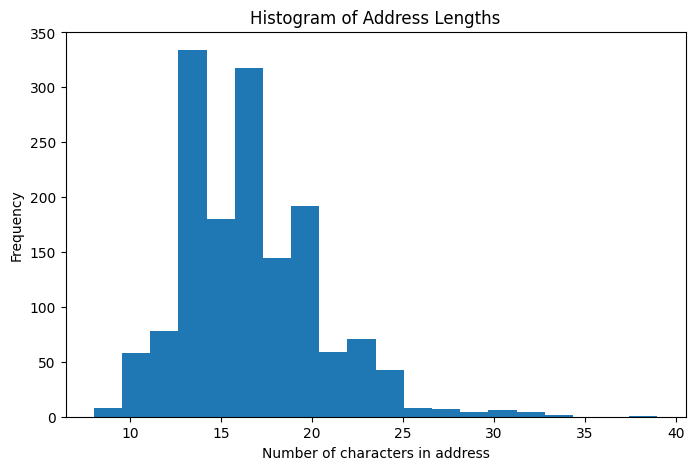

In [14]:
import matplotlib.pyplot as plt

# Create a numeric column for histogram
df['ADDRESS_LENGTH'] = df['ADDRESS LINE 1'].astype(str).apply(len)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df['ADDRESS_LENGTH'], bins=20)
plt.title("Histogram of Address Lengths")
plt.xlabel("Number of characters in address")
plt.ylabel("Frequency")
plt.show()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

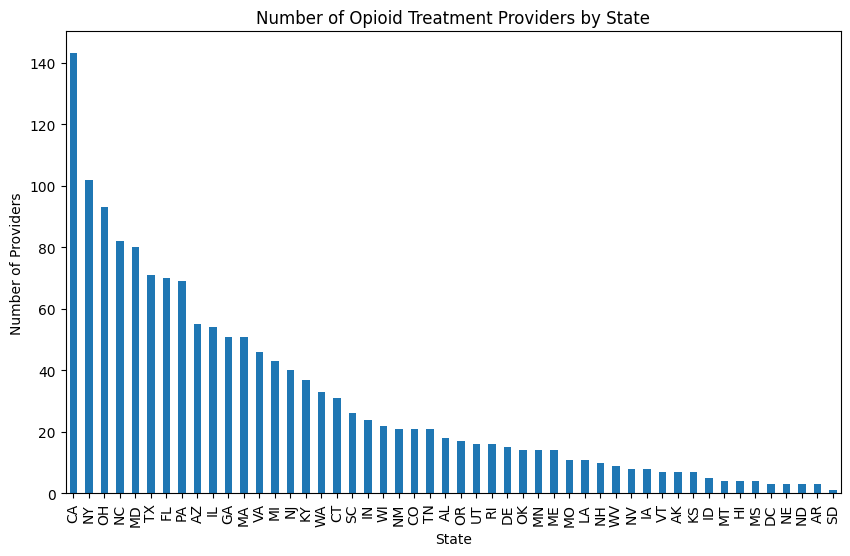

STATE
CA    143
NY    102
OH     93
NC     82
MD     80
TX     71
FL     70
PA     69
AZ     55
IL     54
GA     51
MA     51
VA     46
MI     43
NJ     40
KY     37
WA     33
CT     31
SC     26
IN     24
WI     22
NM     21
CO     21
TN     21
AL     18
OR     17
UT     16
RI     16
DE     15
OK     14
MN     14
ME     14
MO     11
LA     11
NH     10
WV      9
NV      8
IA      8
VT      7
AK      7
KS      7
ID      5
MT      4
HI      4
MS      4
DC      3
NE      3
ND      3
AR      3
SD      1
Name: count, dtype: int64

In [15]:
# Count providers by state
state_counts = df['STATE'].value_counts()

# Plot bar chart
plt.figure(figsize=(10,6))
state_counts.plot(kind='bar')
plt.title("Number of Opioid Treatment Providers by State")
plt.xlabel("State")
plt.ylabel("Number of Providers")
plt.show()

state_counts



---



## Submitting Your Work

Submit your work as usual.